In [23]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Create Dataframe
df = pd.read_csv("Telco-Customer-Churn.csv")

In [25]:
# First ten rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [26]:
# Names of dataset columns
columns = df.columns
print(columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [27]:
# Data types per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# Convert "TotalCharges" to numeric
df["TotalCharges"] = df["TotalCharges"].replace('', np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [29]:
# Missing Values
df.dropna(inplace=True)

In [30]:
# Drop "customerID"
df.drop("customerID", axis=1, inplace=True)

In [31]:
# Convert "Churn" to binary data
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [32]:
# Convert categorical columns and create new dataframe
category_columns = df.select_dtypes(include=["object"]).columns
telecom_cust_dummies = pd.get_dummies(df[category_columns], drop_first=True)
telecom_cust_dummies = telecom_cust_dummies.astype(int)
telecom_cust_dummies.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


                                          Churn  SeniorCitizen    tenure  \
Churn                                  1.000000       0.150541 -0.354049   
SeniorCitizen                          0.150541       1.000000  0.015683   
tenure                                -0.354049       0.015683  1.000000   
MonthlyCharges                         0.192858       0.219874  0.246862   
TotalCharges                          -0.199484       0.102411  0.825880   
gender_Male                           -0.008545      -0.001819  0.005285   
Partner_Yes                           -0.149982       0.016957  0.381912   
Dependents_Yes                        -0.163128      -0.210550  0.163386   
PhoneService_Yes                       0.011691       0.008392  0.007877   
MultipleLines_No phone service        -0.011691      -0.008392 -0.007877   
MultipleLines_Yes                      0.040033       0.142996  0.332399   
InternetService_Fiber optic            0.307463       0.254923  0.017930   
InternetServ

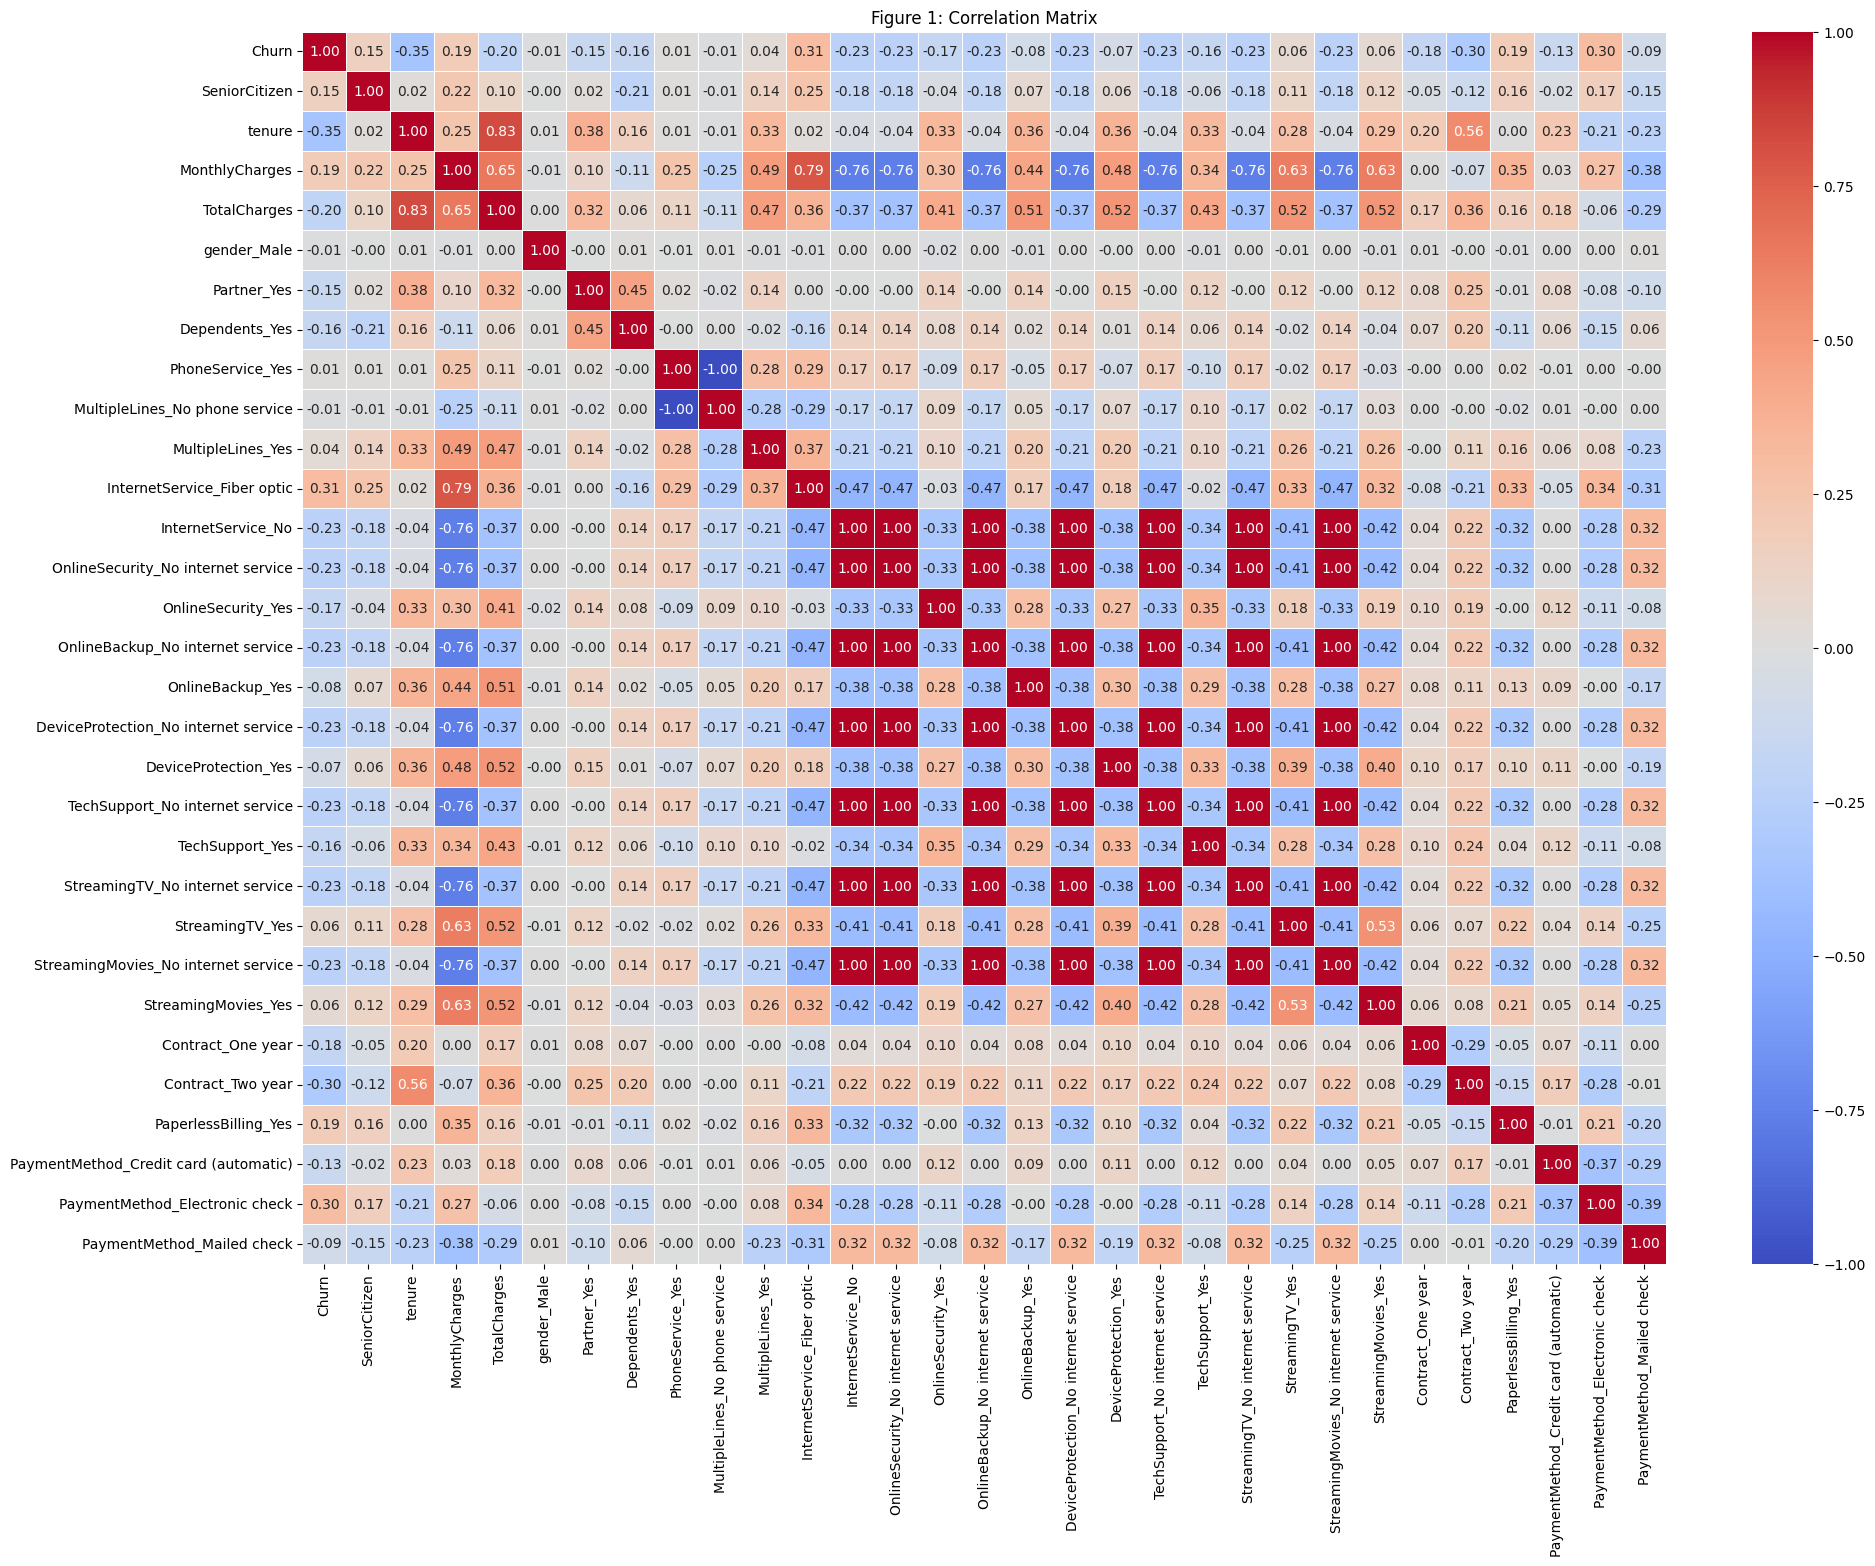

In [33]:
# Correlation Plot

# Create dataframe that include "Churn"
correlation_df = pd.concat([df["Churn"], df.select_dtypes(include=["int64", "float64"]).drop(columns=["Churn"]), telecom_cust_dummies], axis=1)
correlation_matrix = correlation_df.corr()
print(correlation_matrix)

# Visualise Correlation plot
plt.figure(figsize=(22,16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Figure 1: Correlation Matrix")
plt.show()

The above correlation plot shows the how good the correlationis between different columns. The focus gere is specificaaly to see what data best relates to churn. The closer to 1 the score the better the correlation and if the value is "-" it means as the one goes up the other goes down. Therefore, tenure has the "best" negative relationship, indicating the time customer is with the company has the largest impact on the "churn".

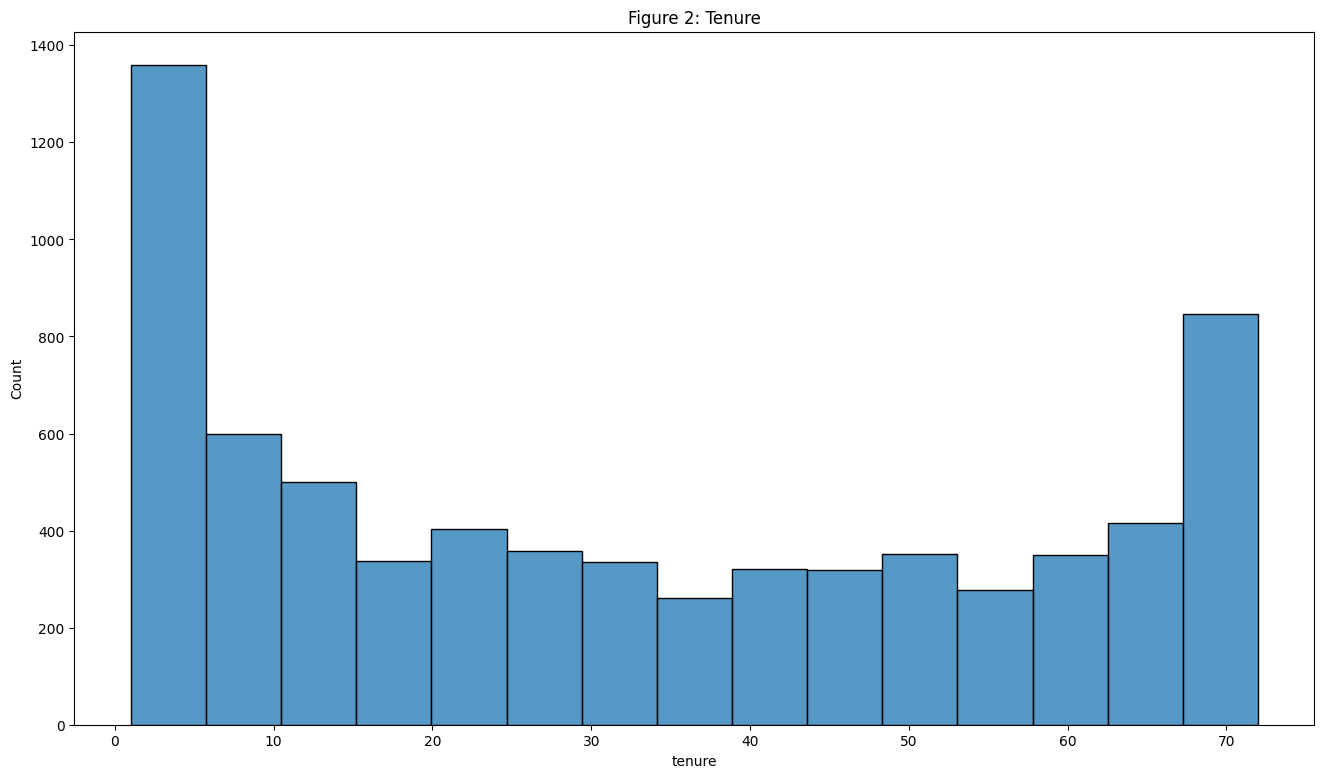

In [34]:
# Histogram
plt.figure(figsize=(16,9))
sns.histplot(data=df, x="tenure", multiple="stack")
plt.title("Figure 2: Tenure")
plt.show()

In the above histogram we see most customers between 0 - 5 months, which means they have a lot of new customers that joined in recent months.There is also a lot of customers that have been with the company 65 + months which means thay were able to keep a lot of customers happy in the longrun, however there is a sudden drop after 5 months which can indicate that something is co tributing to them leaving after 6 months, perhaps a contract pricing that they choose not the extend it.

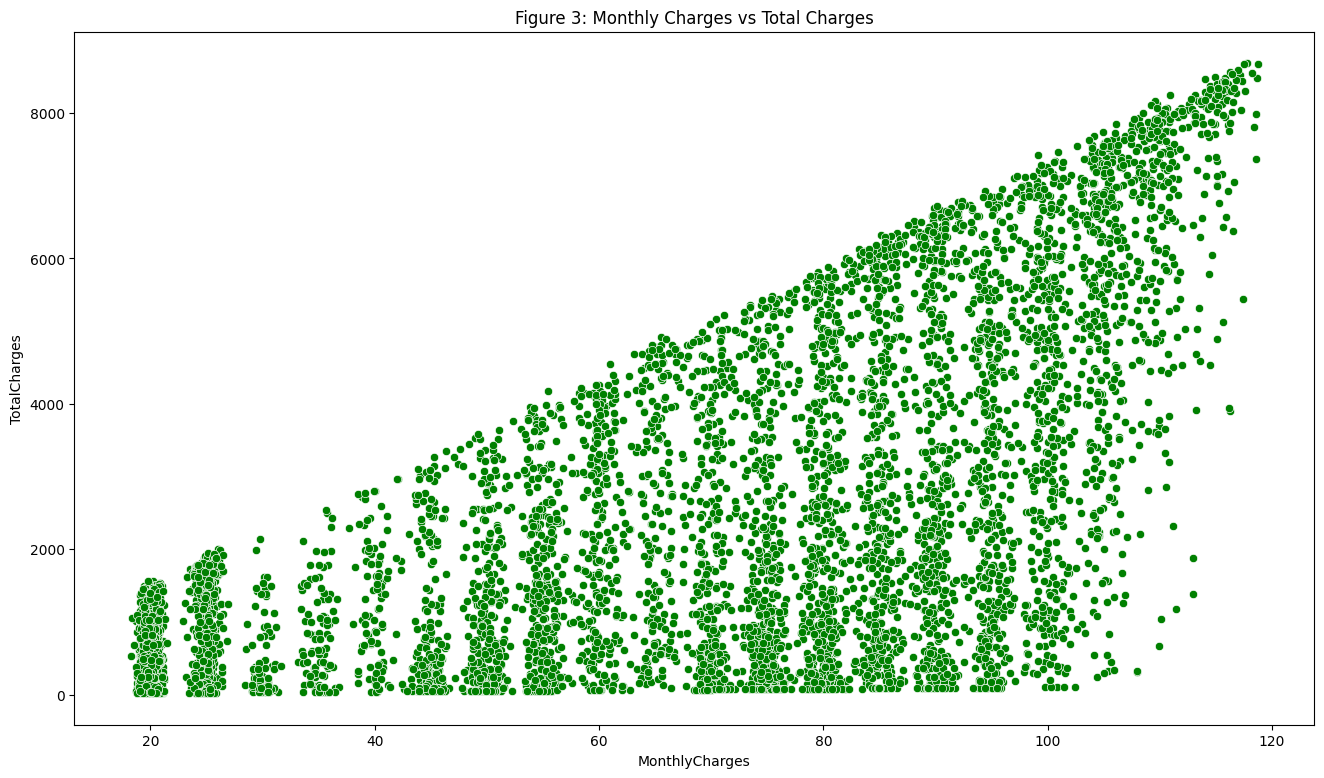

In [35]:
# Scatter Plot
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", color="green")
plt.title("Figure 3: Monthly Charges vs Total Charges")
plt.show()

The higher the monthly charges the higher the total charges. The figure indicates that a lot less people are paying more than 100 monthly or total of 6000 +. The people that do are the people are the ones that have stayed with the company for a long time. In figure 2 we saw that the number of customer with tenure ranging between 0 to 5 was the highest which contributes to the density in the total charges of less than 2000. The figure also shows what customers are montsly interested inwhich is between 45 to 55 per month and 70 t0 90, those are the packages most people seem to go for.

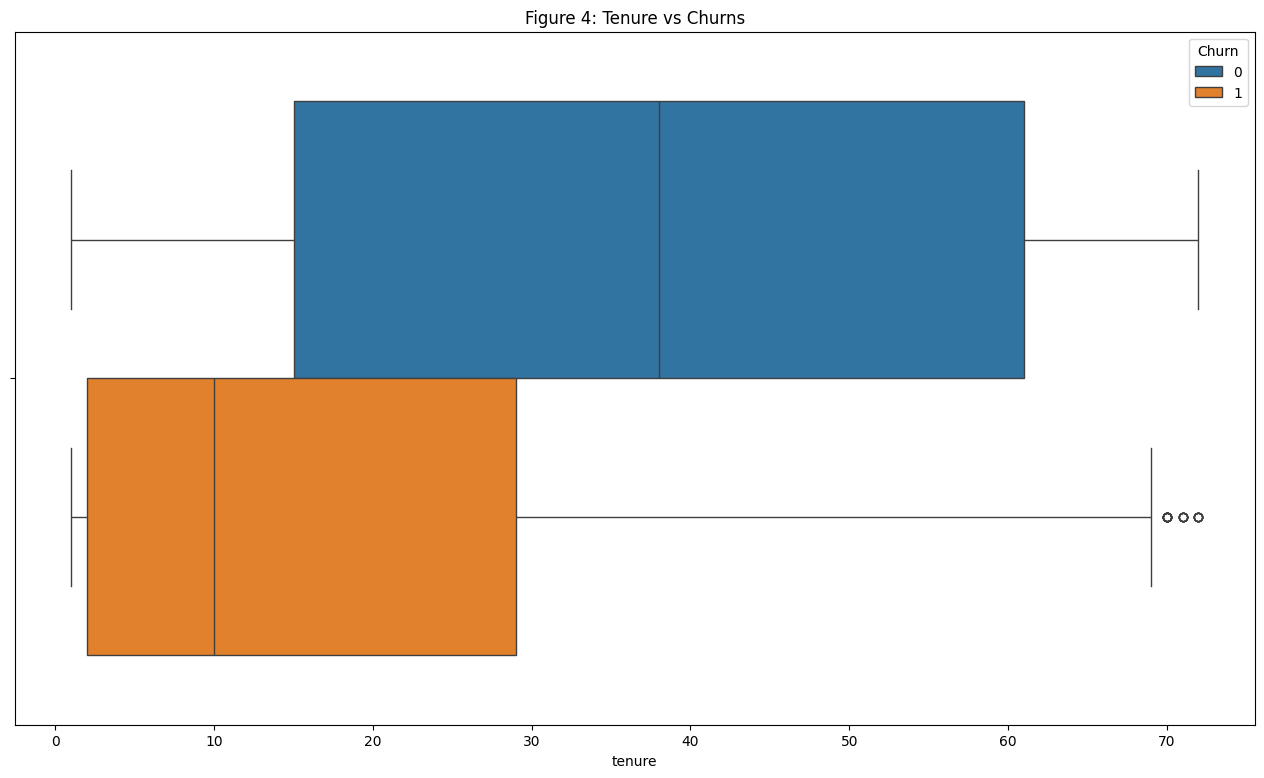

In [36]:
# Box Plot
plt.figure(figsize=(16,9))
sns.boxplot(data=df, x="tenure", hue="Churn")
plt.title("Figure 4: Tenure vs Churns")
plt.show()

Figure 4 displays the relationship between tenure and the chrun. It indicates that median customers are likely to stay with the company throughout the tenure period. There are a few outliers with customer beyond 70 months would leave. Most customers that churn are with the company for a short period about 3 to 28 months. This shows that the company is able to keep clients happy over a long period.

In [37]:
# Scale variables
from sklearn.preprocessing import MinMaxScaler
df_scaled = df.copy()
numeric_columns = df_scaled.select_dtypes(include=["int64", "float64"]).drop(columns=["Churn"]).columns
scaled = MinMaxScaler()
df_scaled[numeric_columns] = scaled.fit_transform(df_scaled[numeric_columns])

In [38]:
# X and y variables
numeric_columns = df.select_dtypes(include=["int64", "float64"]).drop(columns=["Churn"])
X = pd.concat([numeric_columns, telecom_cust_dummies], axis=1)
y = df["Churn"]

In [39]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# Import Logistic LinearRegression
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=4000) # Changed the number of iterations, was running an error
logistic_model.fit(X_train, y_train)

# Prediction
lrm_y_pred = logistic_model.predict(X_test)

# Accuracy score
from sklearn.metrics import accuracy_score
linear_model_accuracy_score = accuracy_score(y_test, lrm_y_pred)
print("Logistic regression model accuracy score: ", linear_model_accuracy_score)

Logistic regression model accuracy score:  0.7895335608646189


79% of the predictions are correct. not that bad but is is not great, it essentially means the model is getting 21% of the predictions wrong.

In [41]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = rf_two = RandomForestClassifier(n_estimators = 2000,
                                      oob_score=True,
                                      max_features="sqrt",
                                      max_leaf_nodes=50,
                                      bootstrap=True
                                      )

# Fit model
rf.fit(X_train, y_train)

# Prediction
rf_y_pred = rf.predict(X_test)

# Accuracy score
rf_accuracy_score = accuracy_score(rf_y_pred, y_test)
print("Accuracy score: ", rf_accuracy_score)

# OOB Error
OOB_error = 1 - rf.oob_score_
print("OOB error score: ", OOB_error)


Accuracy score:  0.7940841865756542
OOB error score:  0.19245354569586648


OOB score gives an indicationof how well the model predicts. The model predicts 19% of values incorrectly, which means it is 80% accurate.

In [42]:
# Confusion Matrix Logistic Regression and model score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

lrm_confu_matrix = confusion_matrix(y_test, lrm_y_pred)
print(lrm_confu_matrix)

lrm_precision = precision_score(y_test, lrm_y_pred)
lrm_recall = recall_score(y_test, lrm_y_pred)

print("Precision of Logistic Regression model: ", lrm_precision)
print("Recall of Logistic Regression model: ", lrm_recall)

[[1153  147]
 [ 223  235]]
Precision of Logistic Regression model:  0.6151832460732984
Recall of Logistic Regression model:  0.5131004366812227


The confusion matrix indicates that the logistic regression model is better at predicting the non churn (TN = 1153).
Precision score is at a 61.5%, which indicates from all the predictions correctly predicted the churn.
Recall score at 51% indicates that the model in currently only identifying half of the customers that churn. Half of the customers that was predicted to churn was lost.

In [43]:
# Confusion Matrix Random Forrest & model score
rf_confu_matrix = confusion_matrix(y_test, rf_y_pred)
print(rf_confu_matrix)

rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

print("Precision of RandomForrest model: ", rf_precision)
print("Recall of RandomForrest model: ", rf_recall)

[[1189  111]
 [ 251  207]]
Precision of RandomForrest model:  0.6509433962264151
Recall of RandomForrest model:  0.4519650655021834


The random forest model is good at predicting the no churns, (TN =1187), but when it comes to the TP who are the customers that did churn the value is very low. 
The precision score of 64% shows how well the the model predicted the customers who would churn. But the customers that the model predicted that would churn that didn't is at a 36%.
The recall is 45% which means that the 45% of the customers that churned were caught while the delta percentage were missed.

Logistic Regression vs Random Forest Model:
The models are both strong, it depends on what 
the goal is and in this case it is to predict customer churn to prevent the company from losing customers. Both models are cloe in terms of the accuracy scores. Precision scores are also close, it predicts the churns where the customer will leave. Precision is not very accurate in determing which customers will leave with scores ranging between 61 to 65%.
Recall predicts highlights the true positives where customers were correctly predicted as churned. The logistic regression model predicted best in this regard at 51%, which is also not great because it only tells us a little more than half of what customers will be churned. 
Therefore, I would choose the logistc regression model to predict churn.